<a href="https://colab.research.google.com/github/smahesh2694/NEU_XAI/blob/master/severstal_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
import cv2
import pandas as pd
import numpy as np
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt


In [3]:
cd /content/drive/My Drive/Kaggle/severstal-steel-old/saved_images/train

/content/drive/My Drive/Kaggle/severstal-steel-old/saved_images/train


In [165]:
from google.colab.patches import cv2_imshow

folder = '2/'
files = os.listdir(folder)

for imgs in tqdm(range(len(files))):
  ip_img_gray = cv2.imread(folder+files[imgs], 0)
  # histeq_img = cv2.equalizeHist(ip_img_gray)

  '''
    Contrast Limited Adaptive Histogram Equalization
    https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_histogram_equalization/py_histogram_equalization.html
  '''
  clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))  
  clahe_img_gray = clahe.apply(ip_img_gray)

  ip_img = cv2.cvtColor(ip_img_gray, cv2.COLOR_GRAY2BGR)
  clahe_img = cv2.cvtColor(clahe_img_gray, cv2.COLOR_GRAY2BGR)

  plt.imsave("/content/drive/My Drive/Kaggle/severstal-steel-old/saved_images/augmented/train/2/"
            +"clahe_"+str((imgs+1))+".png",clahe_img)

# fig = plt.figure()
# fig.add_subplot(1, 2, 1)
# plt.title("Original Image")
# plt.imshow(ip_img)
# fig.add_subplot(1, 2, 2)
# plt.title("CLAHE Image")
# plt.imshow(clahe_img)


100%|██████████| 147/147 [00:06<00:00, 21.54it/s]


In [166]:
from google.colab.patches import cv2_imshow

folder = '2/'
files = os.listdir(folder)

for imgs in tqdm(range(len(files))):
  ip_img_gray = cv2.imread(folder+files[imgs], 0)

  dummy = np.zeros((ip_img_gray.shape[0], ip_img_gray.shape[1]), dtype='uint8')

  min_val = np.min(ip_img_gray)
  max_val = np.max(ip_img_gray)

  for i in range(ip_img_gray.shape[0]):
    for j in range(ip_img_gray.shape[1]):
      dummy[i,j] = 255 * ((ip_img_gray[i,j] - min_val) / max_val - min_val)

  ip_img = cv2.cvtColor(ip_img_gray, cv2.COLOR_GRAY2BGR)
  dummy_rgb = cv2.cvtColor(dummy, cv2.COLOR_GRAY2BGR)

  plt.imsave("/content/drive/My Drive/Kaggle/severstal-steel-old/saved_images/augmented/train/2/"
            +"contrast_stretching_"+str(imgs+1)+".png", dummy_rgb)

100%|██████████| 147/147 [00:36<00:00,  4.09it/s]


In [0]:
# ip_img = cv2.imread(folder+files[94])

# neg_img = 255 - ip_img

# fig = plt.figure()
# fig.add_subplot(1, 2, 1)
# plt.title("Original Image")
# plt.imshow(ip_img)
# fig.add_subplot(1, 2, 2)
# plt.title("Negative Image")
# plt.imshow(neg_img)

In [167]:
folder = '2/'
files = os.listdir(folder)

for imgs in tqdm(range(len(files))):
  ip_img = cv2.imread(folder+files[imgs])

  # kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
  kernel = np.array([[0,-1,0],[-1,7,-1],[0,-1,0]])
  sharp_img = cv2.filter2D(ip_img, -1, kernel)

  plt.imsave("/content/drive/My Drive/Kaggle/severstal-steel-old/saved_images/augmented/train/2/"
            +"sharpened_"+str(imgs+1)+".png", sharp_img)

100%|██████████| 147/147 [00:05<00:00, 25.92it/s]


In [174]:
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from random import randrange, uniform

folder = '2/'
files = os.listdir(folder)

for trial in tqdm(range(1,6)):
  for imgs in tqdm(range(len(files))):
    ip_img = cv2.imread(folder+files[imgs])
    ip_array = np.array(ip_img)

    datagen = ImageDataGenerator()

    transform_img = datagen.apply_transform(
                                            x = ip_array,
                                            transform_parameters =
                                                {
                                                    'theta' : randrange(0,360,10),
                                                    'brightness': round(uniform(0.5,1), 2),
                                                    'tx': randrange(-30,30,5),
                                                    'ty': randrange(-30,30,5),
                                                    'shear': randrange(-25,25,5),
                                                    # 'zx': round(uniform(-0.5,0.5),2),
                                                    # 'zy': uniform(-0.5,0.5),
                                                    'flip_horizontal': (random() < 0.5),  #randomly returns true or false
                                                    'flip_vertical': (random() < 0.5)

                                                }                                                                                        
                                            )
    cv2.imwrite("/content/drive/My Drive/Kaggle/severstal-steel-old/saved_images/augmented/train/2/"
              +"random_augment_"+str(trial)+"_"+str(imgs+1)+".png", transform_img)


100%|██████████| 5/5 [00:26<00:00,  5.22s/it]


Structural Similarity : 0.2078


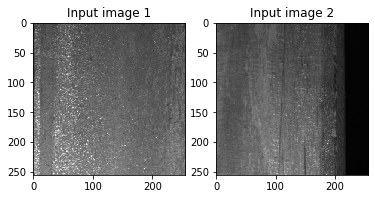

In [0]:
from skimage.metrics import structural_similarity as ssim

ip_img_1 = cv2.imread(folder+files[44])
ip_img_2 = cv2.imread(folder+files[16])

fig = plt.figure()
fig.add_subplot(1,2,1)
plt.title("Input image 1")
plt.imshow(ip_img_1)
fig.add_subplot(1,2,2)
plt.title("Input image 2")
plt.imshow(ip_img_2)

score, diff = ssim(ip_img_1, ip_img_2, multichannel=True, full = True)
'''
    @returns:
    {float} a float {-1:1} that measures structural similarity
      between the input images
'''
print("Structural Similarity : %0.4f" %score)

# diff = (diff * 255).astype("uint8")
# cv2_imshow(diff)


In [0]:
from scipy.stats import wasserstein_distance

img_a = cv2.imread(folder+files[44],0)
img_b = cv2.imread(folder+files[16],0)

'''
  hist is a 256x1 array, each value corresponds to number of pixels in that image with its corresponding pixel value.
'''
hist_a = cv2.calcHist([img_a],[0],None,[256],[0,256])
hist_b = cv2.calcHist([img_b],[0],None,[256],[0,256])

'''
  Computes the first Wasserstein distance between two 1D distributions.
'''
wd = wasserstein_distance(np.ravel(hist_a), np.ravel(hist_b))
print("Wasserstein Distance : %0.4f" %wd)

Wasserstein Distance : 75.6484


In [0]:
from scipy.stats import wasserstein_distance

def get_histogram(img):
  '''
  Get the histogram of an image. For an 8-bit, grayscale image, the
  histogram will be a 256 unit vector in which the nth value indicates
  the percent of the pixels in the image with the given darkness level.
  The histogram's values sum to 1.
  '''
  h, w = img.shape
  hist = [0.0] * 256
  for i in range(h):
    for j in range(w):
      hist[img[i, j]] += 1
  return np.array(hist) / (h * w) 

img_a = cv2.imread(folder+files[44],0)
img_b = cv2.imread(folder+files[16],0)

hist_a = get_histogram(img_a)
hist_b = get_histogram(img_b)
wd = wasserstein_distance(hist_a, hist_b)
print(wd)

0.0011543035507202148
